## Outline

1. Read libraries
2. Data preparation
	- Re-split data into train and test
3. Data vectorization (for train data)
	- Word tokenization
	- Word stemming
	- Word Lemmatization
	- Bag of Words (BoW) with train data
	- Tf - idf with train data
4. Data vectorization (for test data)
	- Word tokenization
	- Word stemming
	- Word Lemmatization
	- BoW with test data
	- TF-IDF with test data
5. Model Building: Sentiment Analysis
	- Splitting the Dataset into Train and Test set
	- Logistic Regression
	- Logistic Regression (2)
	- Support Vector Machine (SVM)
	- Gaussian NB classifier
	- MultinomialNB classifier
	- Xgboost classifier
	- Decision Tree
	- Random Forest
	- Deep Learning Classification (RNN-LSTM)
	- Using Vader Pre-trained model
6. Data prediction
7. Save Model
8. Load Model
9. Conclusion

## 1) Read libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# for nlp
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob

# for stemming
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

# for Lemmatizing
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for machine learning
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# save and load models
import pickle

# import warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Data preparation

**This includes**:
    - Re-split data into train and test

In [2]:
# Read data
df = pd.read_csv("C:/Users/lenovo/Desktop/hate_speech_detection/data_analyzed_df.csv")
del df['Unnamed: 0']
df

,id,label,tweet,tidy_tweet,hashtag,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper_case
0,1,0.0,@user when a father is dysfunctional and is s...,dysfunctional selfish drags kids dysfunction #run,run,21,102,4.555556,10,1,0,0
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...,lyft disapointed getthanked,22,122,5.315789,5,3,0,0
2,3,0.0,bihday your majesty,majesty,NaN,5,21,5.666667,1,0,0,0
3,4,0.0,#model i love u take with u all the time in ...,#model,model,17,86,4.928571,5,1,0,0
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,motivation,8,39,8.000000,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory left right polarisation #trump...,trump uselections leadership politics ...,13,108,8.727273,0,6,0,0
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling mermaid #hairflip #neverready #formal ...,hairflip neverready formal wedding gown ...,15,96,6.307692,1,7,0,0
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillary #campaigned #ohio used words assets l...,hillary campaigned ohio omg clinton ra...,20,145,7.411765,3,5,0,0
49157,49158,NaN,"happy, at work conference: right mindset leads...",work conference right mindset leads culture de...,work mindset,15,104,7.500000,2,2,0,0


### 2.1 Re-split data into train and test

In [3]:
# check data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          49159 non-null  int64  
 1   label       31962 non-null  float64
 2   tweet       49159 non-null  object 
 3   tidy_tweet  48810 non-null  object 
 4   hashtag     35894 non-null  object 
 5   word_count  49159 non-null  int64  
 6   char_count  49159 non-null  int64  
 7   avg_word    49159 non-null  float64
 8   stopwords   49159 non-null  int64  
 9   hashtags    49159 non-null  int64  
 10  numerics    49159 non-null  int64  
 11  upper_case  49159 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 4.5+ MB


In [4]:
# split the data based on label
train_df = df[0:31962]
test_df = df[31962:]

**After re-splitting**

- train data: (31962, 3)
- test data: (17197, 2)

In [5]:
# chek train dataframe
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          31962 non-null  int64  
 1   label       31962 non-null  float64
 2   tweet       31962 non-null  object 
 3   tidy_tweet  31751 non-null  object 
 4   hashtag     23364 non-null  object 
 5   word_count  31962 non-null  int64  
 6   char_count  31962 non-null  int64  
 7   avg_word    31962 non-null  float64
 8   stopwords   31962 non-null  int64  
 9   hashtags    31962 non-null  int64  
 10  numerics    31962 non-null  int64  
 11  upper_case  31962 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 2.9+ MB


The most important column here is **'tidy_tweet',** which has the pre-processed version of the tweets. We will do verctorization and modeling over this column.

In [6]:
# check test dataframe
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 31962 to 49158
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          17197 non-null  int64  
 1   label       0 non-null      float64
 2   tweet       17197 non-null  object 
 3   tidy_tweet  17059 non-null  object 
 4   hashtag     12530 non-null  object 
 5   word_count  17197 non-null  int64  
 6   char_count  17197 non-null  int64  
 7   avg_word    17197 non-null  float64
 8   stopwords   17197 non-null  int64  
 9   hashtags    17197 non-null  int64  
 10  numerics    17197 non-null  int64  
 11  upper_case  17197 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1.6+ MB


In [7]:
# drop rows where tidy_tweet = null
train_df = train_df[train_df['tidy_tweet'].notna()]
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31751 entries, 0 to 31961
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          31751 non-null  int64  
 1   label       31751 non-null  float64
 2   tweet       31751 non-null  object 
 3   tidy_tweet  31751 non-null  object 
 4   hashtag     23346 non-null  object 
 5   word_count  31751 non-null  int64  
 6   char_count  31751 non-null  int64  
 7   avg_word    31751 non-null  float64
 8   stopwords   31751 non-null  int64  
 9   hashtags    31751 non-null  int64  
 10  numerics    31751 non-null  int64  
 11  upper_case  31751 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 3.1+ MB


## 3. Data vectorization (for train data)

In order to use textual data for predictive modeling, words need to then be encoded as integers, or floating-point values, for use as inputs in machine learning algorithms. This process is called feature extraction (or vectorization). This includes:

- Word tokenization
- Data normalization
    - Word stemming
    - Word Lemmatization
- Bag of Words (BoW) with train data
- Tf - idf with train data

### 3.1 Word tokenization

In [8]:
train_df['token'] = train_df['tidy_tweet'].apply(lambda x: word_tokenize(x))
train_df

,id,label,tweet,tidy_tweet,hashtag,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper_case,token
0,1,0.0,@user when a father is dysfunctional and is s...,dysfunctional selfish drags kids dysfunction #run,run,21,102,4.555556,10,1,0,0,"[dysfunctional, selfish, drags, kids, dysfunct..."
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...,lyft disapointed getthanked,22,122,5.315789,5,3,0,0,"[thanks, #, lyft, credit, cause, offer, wheelc..."
2,3,0.0,bihday your majesty,majesty,NaN,5,21,5.666667,1,0,0,0,[majesty]
3,4,0.0,#model i love u take with u all the time in ...,#model,model,17,86,4.928571,5,1,0,0,"[#, model]"
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,motivation,8,39,8.000000,1,1,0,0,"[factsguide, society, #, motivation]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,31958,0.0,ate @user isz that youuu?ðððððð...,youuu,NaN,6,68,12.600000,1,0,0,0,[youuu]
31958,31959,0.0,to see nina turner on the airwaves trying to...,nina turner airwaves trying wrap mantle genuin...,shame imwithher,25,131,4.652174,9,2,0,0,"[nina, turner, airwaves, trying, wrap, mantle,..."
31959,31960,0.0,listening to sad songs on a monday morning otw...,listening songs monday morning work,NaN,15,63,3.769231,5,0,0,0,"[listening, songs, monday, morning, work]"
31960,31961,1.0,"@user #sikh #temple vandalised in in #calgary,...",#sikh #temple vandalised #calgary #wso condemns,sikh temple calgary wso,13,67,5.500000,2,4,0,0,"[#, sikh, #, temple, vandalised, #, calgary, #..."


### 3.2 Word stemming

In [9]:
# Created one more columns tweet_stemmed it shows tweets' stemmed version
train_df['tweet_stemmed'] = train_df['token'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
train_df.head()

,id,label,tweet,tidy_tweet,hashtag,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper_case,token,tweet_stemmed
0,1,0.0,@user when a father is dysfunctional and is s...,dysfunctional selfish drags kids dysfunction #run,run,21,102,4.555556,10,1,0,0,"[dysfunctional, selfish, drags, kids, dysfunct...",dysfunct selfish drag kid dysfunct # run
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...,lyft disapointed getthanked,22,122,5.315789,5,3,0,0,"[thanks, #, lyft, credit, cause, offer, wheelc...",thank # lyft credit caus offer wheelchair van ...
2,3,0.0,bihday your majesty,majesty,NaN,5,21,5.666667,1,0,0,0,[majesty],majesti
3,4,0.0,#model i love u take with u all the time in ...,#model,model,17,86,4.928571,5,1,0,0,"[#, model]",# model
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,motivation,8,39,8.000000,1,1,0,0,"[factsguide, society, #, motivation]",factsguid societi # motiv


### 3.3 Word Lemmatization

In [10]:
train_df['tweet_lemmatized'] = train_df['token'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
train_df.head()

,id,label,tweet,tidy_tweet,hashtag,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper_case,token,tweet_stemmed,tweet_lemmatized
0,1,0.0,@user when a father is dysfunctional and is s...,dysfunctional selfish drags kids dysfunction #run,run,21,102,4.555556,10,1,0,0,"[dysfunctional, selfish, drags, kids, dysfunct...",dysfunct selfish drag kid dysfunct # run,dysfunctional selfish drag kid dysfunction # run
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...,lyft disapointed getthanked,22,122,5.315789,5,3,0,0,"[thanks, #, lyft, credit, cause, offer, wheelc...",thank # lyft credit caus offer wheelchair van ...,thanks # lyft credit cause offer wheelchair va...
2,3,0.0,bihday your majesty,majesty,NaN,5,21,5.666667,1,0,0,0,[majesty],majesti,majesty
3,4,0.0,#model i love u take with u all the time in ...,#model,model,17,86,4.928571,5,1,0,0,"[#, model]",# model,# model
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,motivation,8,39,8.000000,1,1,0,0,"[factsguide, society, #, motivation]",factsguid societi # motiv,factsguide society # motivation


### 3.4 Bag of Words (BoW) with train data

CounterVectorization is a SciKitLearn library takes any text document and returns each unique word as a feature with the count of number of times that word occurs.

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow_vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.9, max_features=1000, min_df=2,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [12]:
# bag-of-words stemmed
trainbow_stem = bow_vectorizer.fit_transform(train_df['tweet_stemmed'])
trainbow_stem

<31751x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 105535 stored elements in Compressed Sparse Row format>

In [13]:
trainbow_stem.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
# bow lemmatized
trainbow_lemm = bow_vectorizer.fit_transform(train_df['tweet_lemmatized'])
trainbow_lemm

<31751x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 95459 stored elements in Compressed Sparse Row format>

In [15]:
trainbow_lemm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

**Note**: Why we need toarray()? This method converts the sparse matrix representation to a dense ndarray representation.

**YOUR TURN**

Can you use the code above without using toarray() function?

### 3.5 Tf - idf with train data

**TF-IDF** works by penalizing the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents.

Let’s have a look at the important terms related to TF-IDF:

TF = (Number of times term t appears in a document)/(Number of terms in the document)
IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.
TF-IDF = TF*IDF

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf_vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.9, max_features=1000,
                min_df=2, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [17]:
# tf-idf stemmed
traintfidf_stem = tfidf_vectorizer.fit_transform(train_df['tweet_stemmed'])
traintfidf_stem.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
# tf-idf lemmatized
traintfidf_lemm = tfidf_vectorizer.fit_transform(train_df['tweet_lemmatized'])
traintfidf_lemm.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## 4. Data vectorization (for test data)

This includes:
    - Word tokenization
    - Word stemming
    - Word Lemmatization
    - BoW with test data
    - TF-IDF with test data

In [19]:
# feature selection of few columns
test_df = test_df[['id','tweet','tidy_tweet']]
test_df.head(2)

,id,tweet,tidy_tweet
31962,31963,#studiolife #aislife #requires #passion #dedic...,#studiolife #aislife #requires #passion #dedic...
31963,31964,@user #white #supremacists want everyone to s...,#white #supremacists everyone #birds #movie


In [20]:
# Take only the rows where data is not NA:
test_df = test_df[test_df['tidy_tweet'].notna()]

In [21]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17059 entries, 31962 to 49158
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          17059 non-null  int64 
 1   tweet       17059 non-null  object
 2   tidy_tweet  17059 non-null  object
dtypes: int64(1), object(2)
memory usage: 533.1+ KB


### 4.1. Word tokenization

Creating token for the clean tweets

In [22]:
test_df['token'] = test_df['tidy_tweet'].apply(lambda x: word_tokenize(x))
test_df.head(2)

,id,tweet,tidy_tweet,token
31962,31963,#studiolife #aislife #requires #passion #dedic...,#studiolife #aislife #requires #passion #dedic...,"[#, studiolife, #, aislife, #, requires, #, pa..."
31963,31964,@user #white #supremacists want everyone to s...,#white #supremacists everyone #birds #movie,"[#, white, #, supremacists, everyone, #, birds..."


### 4.2 Word stemming

In [23]:
# Created one more columns tweet_stemmed it shows tweets' stemmed version
test_df['tweet_stemmed'] = test_df['token'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
test_df.head(2)

,id,tweet,tidy_tweet,token,tweet_stemmed
31962,31963,#studiolife #aislife #requires #passion #dedic...,#studiolife #aislife #requires #passion #dedic...,"[#, studiolife, #, aislife, #, requires, #, pa...",# studiolif # aislif # requir # passion # dedi...
31963,31964,@user #white #supremacists want everyone to s...,#white #supremacists everyone #birds #movie,"[#, white, #, supremacists, everyone, #, birds...",# white # supremacist everyon # bird # movi


### 4.3 Word Lemmatization

In [24]:
test_df['tweet_lemmatized'] = test_df['token'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
test_df.head(2)

,id,tweet,tidy_tweet,token,tweet_stemmed,tweet_lemmatized
31962,31963,#studiolife #aislife #requires #passion #dedic...,#studiolife #aislife #requires #passion #dedic...,"[#, studiolife, #, aislife, #, requires, #, pa...",# studiolif # aislif # requir # passion # dedi...,# studiolife # aislife # requires # passion # ...
31963,31964,@user #white #supremacists want everyone to s...,#white #supremacists everyone #birds #movie,"[#, white, #, supremacists, everyone, #, birds...",# white # supremacist everyon # bird # movi,# white # supremacist everyone # bird # movie


In [25]:
# Importing library
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow_vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.9, max_features=1000, min_df=2,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

### 4.4 BoW with test data

In [26]:
# bow stemmed (test data)
testbow_stem = bow_vectorizer.fit_transform(test_df['tweet_stemmed'])
testbow_stem.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
# bow lemmatized (test data)
testbow_lemm = bow_vectorizer.fit_transform(test_df['tweet_lemmatized'])
testbow_lemm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### 4.5 TF-IDF with test data

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf_vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.9, max_features=1000,
                min_df=2, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [29]:
# tf-idf stemmed (test data)
testtfidf_stem = tfidf_vectorizer.fit_transform(test_df['tweet_stemmed'])
testtfidf_stem.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
# tf-idf lemmatized (test data)
testtfidf_lemm = tfidf_vectorizer.fit_transform(test_df['tweet_lemmatized'])
testtfidf_lemm.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## 5. Model Building: Sentiment Analysis

We are now done with all the pre-modeling stages required to get the data in the proper form and shape. We will be building models on the datasets with different feature sets prepared in the earlier sections — Bag-of-Words, and TF-IDF vectors. We will use the following algorithms to build models:

- Splitting the Dataset into Train and Test set
- Logistic Regression
- Logistic Regression (2)
- Support Vector Machine (SVM)
- Gaussian NB classifier
- MultinomialNB classifier
- Xgboost classifier
- Decision Tree
- Random Forest
- Deep Learning Classification
- Vader Pre-trained model

**A Note on Evaluation Metrics**

We will use the following evaluation metrics:


1. **Accuracy score** is the rate of correct predictions.Out of every 100 predictions made, the model was correct 94 times. It is used when we want to know the number of correct predictions, which is, when the algorithm correctly predicts a type T when it is actually type T. It takes into account all the possible classes and how much we predicted correctly.The score should be as high as possible.

2. **F1 Score** It is the weighted average of Precision and Recall is used when the datasets don't have an equal representation for each type that's being classified. Therefore, this score takes both false positives and false negatives into account. It is suitable for uneven class distribution problems. It is calculated as follows: F1 Score = 2 (Recall Precision) / (Recall + Precision)

3. **A confusion matrix** is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. Confusion matrix represents accurate predictions made along the diagonal of the matrix.

In [1]:
from IPython.display import display
from PIL import Image

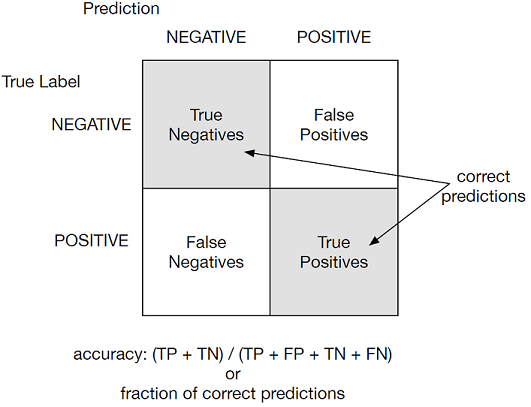

In [3]:
# Confusion matrix
path="C:\\Users\\lenovo\\Tutorials\\03. Data Science\\DS images 2\\confusion-matrix.png"
display(Image.open(path))

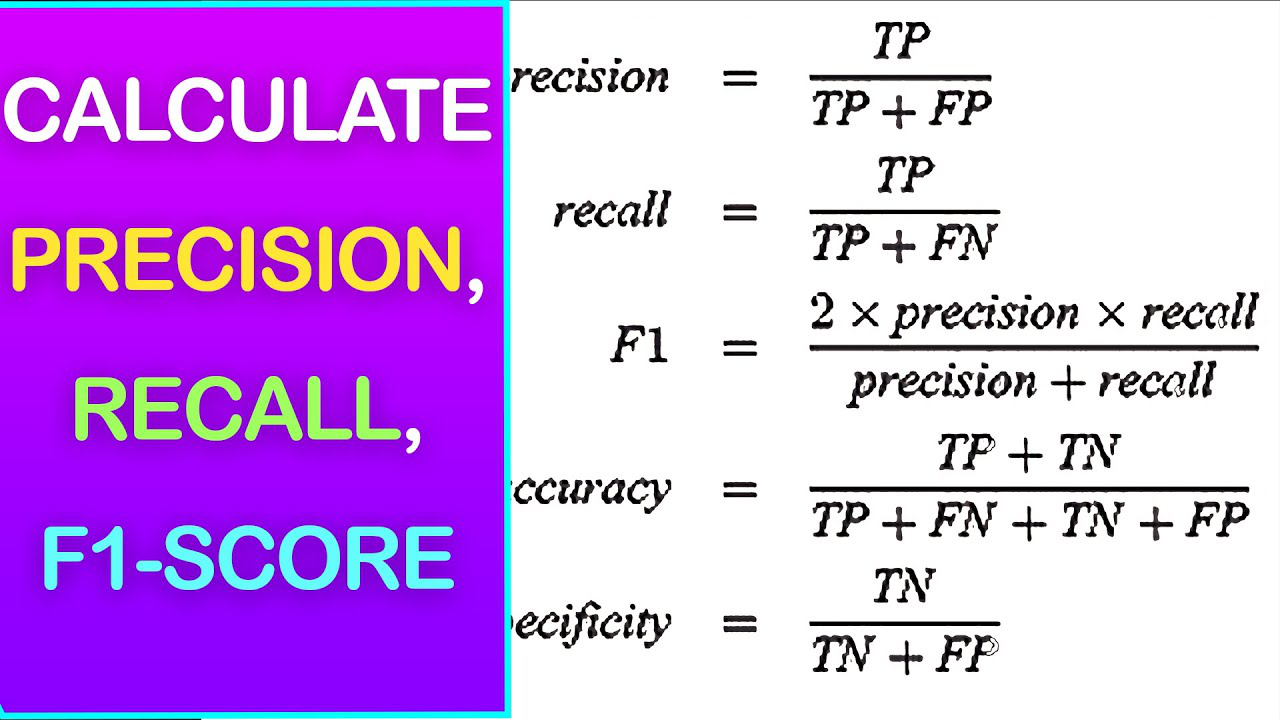

In [4]:
# Evaluation metrics
path="C:\\Users\\lenovo\\Tutorials\\03. Data Science\\DS images 2\\f1-score.jpg"
display(Image.open(path))

### 5.1 Splitting the Dataset into Train and Test set

In [31]:
X=traintfidf_lemm #x: predictors
y=train_df['label'] #y: label

In [32]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.3,random_state=42)

We will aplly an number of classifiers

### 5.2 Logistic Regression

In [33]:
lr=LogisticRegression() # for lemmatized data
lr.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
predict_lr=lr.predict(xtest)

In [35]:
print("accuracy score :", accuracy_score(predict_lr,ytest))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(predict_lr,ytest))

print(confusion_matrix(predict_lr,ytest))
print(classification_report(predict_lr,ytest))

accuracy score : 0.9455175309678774
f1 score : 0.4188129899216126
[[8820  479]
 [  40  187]]
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      9299
         1.0       0.28      0.82      0.42       227

    accuracy                           0.95      9526
   macro avg       0.64      0.89      0.70      9526
weighted avg       0.98      0.95      0.96      9526



### 5.3 Logistic Regression (2)

In [36]:
X1=traintfidf_stem # for stemmed data
y1=train_df['label']

In [37]:
x1train,x1test,y1train,y1test=train_test_split(X1,y1,test_size=.3,random_state=42)

In [38]:
lr1=LogisticRegression()
lr1.fit(x1train,y1train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
predict_lr1=lr1.predict(x1test)

In [40]:
# accuracy score
print("accuracy score :", accuracy_score(predict_lr1,y1test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(predict_lr1,ytest))

print(confusion_matrix(predict_lr1,y1test))
print(classification_report(predict_lr1,y1test))

accuracy score : 0.94625236195675
f1 score : 0.4260089686098655
[[8824  476]
 [  36  190]]
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      9300
         1.0       0.29      0.84      0.43       226

    accuracy                           0.95      9526
   macro avg       0.64      0.89      0.70      9526
weighted avg       0.98      0.95      0.96      9526



### 5.4 Support Vector Machine (SVM)

In [41]:
svc=SVC()
svc.fit(xtrain,ytrain)
predict_svc=svc.predict(xtest)

In [42]:
# accuracy score
print("accuracy score :", accuracy_score(predict_svc,ytest))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(predict_svc,ytest))

print(confusion_matrix(predict_svc,ytest))
print(classification_report(predict_svc,ytest))

accuracy score : 0.9496115893344531
f1 score : 0.4713656387665198
[[8832  452]
 [  28  214]]
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      9284
         1.0       0.32      0.88      0.47       242

    accuracy                           0.95      9526
   macro avg       0.66      0.92      0.72      9526
weighted avg       0.98      0.95      0.96      9526



### 5.5 Gaussian NB classifier

**Naive Bayes** is a classification technique based on Bayes' Theorem. Bayes’ theorem is based conditional probability which states the likelihood the occurrence of event “A” given another event “B” has already happened. There are 3 type of Naïve Bayes:

1. **Gaussian** -> The model assume that the data follows normal distribution and all our features are continuous.
2. **Bernoulli** -> It assumes that all our features are binary such that they only take two values: 0s and 1s.
3. **Multinomial** -> It assumes that the data has discreate value such as ratings between 1 to 5.


In [43]:
nb=GaussianNB()
nb.fit(xtrain.toarray(),ytrain)
predict_nb=nb.predict(xtest.toarray())

In [44]:
# accuracy score
print("accuracy score :", accuracy_score(predict_nb,ytest))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(predict_nb,ytest))

print(confusion_matrix(predict_nb,ytest))
print(classification_report(predict_nb,ytest))

accuracy score : 0.5878647910980475
f1 score : 0.22989407610827772
[[5014   80]
 [3846  586]]
              precision    recall  f1-score   support

         0.0       0.57      0.98      0.72      5094
         1.0       0.88      0.13      0.23      4432

    accuracy                           0.59      9526
   macro avg       0.72      0.56      0.47      9526
weighted avg       0.71      0.59      0.49      9526



### 5.6 MultinomialNB classifier

In [45]:
mlnb = MultinomialNB()
mlnb.fit(xtrain.toarray(),ytrain)
predict_mlnb=mlnb.predict(xtest.toarray())

In [46]:
# accuracy score
print("accuracy score :", accuracy_score(predict_mlnb,ytest))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(predict_mlnb,ytest))

print(confusion_matrix(predict_mlnb,ytest))
print(classification_report(predict_mlnb,ytest))

accuracy score : 0.9438379172790258
f1 score : 0.37426900584795325
[[8831  506]
 [  29  160]]
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      9337
         1.0       0.24      0.85      0.37       189

    accuracy                           0.94      9526
   macro avg       0.62      0.90      0.67      9526
weighted avg       0.98      0.94      0.96      9526



### 5.7 Xgboost classifier

In [47]:
xgb = XGBClassifier()
xgb.fit(xtrain.toarray(),ytrain)
predict_xgb=xgb.predict(xtest.toarray())

[09:02:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [48]:
# accuracy score
print("accuracy score :", accuracy_score(predict_xgb,ytest))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(predict_xgb,ytest))

print(confusion_matrix(predict_xgb,ytest))
print(classification_report(predict_xgb,ytest))

accuracy score : 0.9473021205122821
f1 score : 0.4531590413943355
[[8816  458]
 [  44  208]]
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      9274
         1.0       0.31      0.83      0.45       252

    accuracy                           0.95      9526
   macro avg       0.65      0.89      0.71      9526
weighted avg       0.98      0.95      0.96      9526



**Note**

Xgboost classifier is the preferred classifier to use in data science competitions

### 5.8 Decision Tree

In [49]:
dt = DecisionTreeClassifier()
dt.fit(xtrain.toarray(),ytrain)
predict_dt = dt.predict(xtest.toarray())

In [50]:
# accuracy score
print("accuracy score :", accuracy_score(predict_dt,ytest))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(predict_dt,ytest))

print(confusion_matrix(predict_dt,ytest))
print(classification_report(predict_dt,ytest))

accuracy score : 0.9438379172790258
f1 score : 0.5327510917030568
[[8686  361]
 [ 174  305]]
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      9047
         1.0       0.46      0.64      0.53       479

    accuracy                           0.94      9526
   macro avg       0.72      0.80      0.75      9526
weighted avg       0.95      0.94      0.95      9526



### 5.9 Random Forest

In [51]:
rf = RandomForestClassifier()
rf.fit(xtrain.toarray(),ytrain) # you can test with grid search methodology
predict_rf = rf.predict(xtest.toarray())

In [52]:
# accuracy score
print("accuracy score :", accuracy_score(predict_rf,ytest))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(predict_rf,ytest))

print(confusion_matrix(predict_rf,ytest))
print(classification_report(predict_rf,ytest))

accuracy score : 0.9525509132899433
f1 score : 0.5670498084291188
[[8778  370]
 [  82  296]]
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97      9148
         1.0       0.44      0.78      0.57       378

    accuracy                           0.95      9526
   macro avg       0.72      0.87      0.77      9526
weighted avg       0.97      0.95      0.96      9526



### 5.10 Deep Learning Classification

In [53]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, SpatialDropout1D
from keras.layers import Bidirectional

In [54]:
max_features = 220
tokenizer = Tokenizer(num_words = max_features, split = (' '))
tokenizer.fit_on_texts(train_df['tweet'].values)
X = tokenizer.texts_to_sequences(train_df['tweet'].values)

# making all the tokens into same sizes using padding.
X = pad_sequences(X, maxlen = max_features)
X.shape

(31751, 220)

In [55]:
Y = train_df['label'].values

In [56]:
model = Sequential()
model.add(Embedding(max_features, 64, input_length = X.shape[1], trainable=False))
model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [57]:
model.fit(X, Y,batch_size=1500,epochs = 1)

22/22 [==============================] - 296s 13s/step - loss: 0.3700 - accuracy: 0.9158


In [58]:
prediction = model.predict(X)
classes_x=np.argmax(prediction,axis=1)

In [59]:
from sklearn.metrics import accuracy_score
score = accuracy_score(Y, classes_x)
print(score)

0.92951403105414


### 5.11 Using Vader Pre-trained model

In [60]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [61]:
train_df['score']=train_df['tweet'].apply(lambda tweet: sid.polarity_scores(tweet))
train_df.head()

,id,label,tweet,tidy_tweet,hashtag,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper_case,token,tweet_stemmed,tweet_lemmatized,score
0,1,0.0,@user when a father is dysfunctional and is s...,dysfunctional selfish drags kids dysfunction #run,run,21,102,4.555556,10,1,0,0,"[dysfunctional, selfish, drags, kids, dysfunct...",dysfunct selfish drag kid dysfunct # run,dysfunctional selfish drag kid dysfunction # run,"{'neg': 0.385, 'neu': 0.615, 'pos': 0.0, 'comp..."
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...,lyft disapointed getthanked,22,122,5.315789,5,3,0,0,"[thanks, #, lyft, credit, cause, offer, wheelc...",thank # lyft credit caus offer wheelchair van ...,thanks # lyft credit cause offer wheelchair va...,"{'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'comp..."
2,3,0.0,bihday your majesty,majesty,NaN,5,21,5.666667,1,0,0,0,[majesty],majesti,majesty,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,4,0.0,#model i love u take with u all the time in ...,#model,model,17,86,4.928571,5,1,0,0,"[#, model]",# model,# model,"{'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'comp..."
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,motivation,8,39,8.000000,1,1,0,0,"[factsguide, society, #, motivation]",factsguid societi # motiv,factsguide society # motivation,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [62]:
train_df['compound']  = train_df['score'].apply(lambda score_dict: score_dict['compound'])
train_df.head()

,id,label,tweet,tidy_tweet,hashtag,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper_case,token,tweet_stemmed,tweet_lemmatized,score,compound
0,1,0.0,@user when a father is dysfunctional and is s...,dysfunctional selfish drags kids dysfunction #run,run,21,102,4.555556,10,1,0,0,"[dysfunctional, selfish, drags, kids, dysfunct...",dysfunct selfish drag kid dysfunct # run,dysfunctional selfish drag kid dysfunction # run,"{'neg': 0.385, 'neu': 0.615, 'pos': 0.0, 'comp...",-0.8296
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...,lyft disapointed getthanked,22,122,5.315789,5,3,0,0,"[thanks, #, lyft, credit, cause, offer, wheelc...",thank # lyft credit caus offer wheelchair van ...,thanks # lyft credit cause offer wheelchair va...,"{'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'comp...",0.6705
2,3,0.0,bihday your majesty,majesty,NaN,5,21,5.666667,1,0,0,0,[majesty],majesti,majesty,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,4,0.0,#model i love u take with u all the time in ...,#model,model,17,86,4.928571,5,1,0,0,"[#, model]",# model,# model,"{'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'comp...",0.7249
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,motivation,8,39,8.000000,1,1,0,0,"[factsguide, society, #, motivation]",factsguid societi # motiv,factsguide society # motivation,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [63]:
train_df['comp_score'] = train_df['compound'].apply(lambda c: 1 if c >0 else 0)
train_df.head()

,id,label,tweet,tidy_tweet,hashtag,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper_case,token,tweet_stemmed,tweet_lemmatized,score,compound,comp_score
0,1,0.0,@user when a father is dysfunctional and is s...,dysfunctional selfish drags kids dysfunction #run,run,21,102,4.555556,10,1,0,0,"[dysfunctional, selfish, drags, kids, dysfunct...",dysfunct selfish drag kid dysfunct # run,dysfunctional selfish drag kid dysfunction # run,"{'neg': 0.385, 'neu': 0.615, 'pos': 0.0, 'comp...",-0.8296,0
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...,lyft disapointed getthanked,22,122,5.315789,5,3,0,0,"[thanks, #, lyft, credit, cause, offer, wheelc...",thank # lyft credit caus offer wheelchair van ...,thanks # lyft credit cause offer wheelchair va...,"{'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'comp...",0.6705,1
2,3,0.0,bihday your majesty,majesty,NaN,5,21,5.666667,1,0,0,0,[majesty],majesti,majesty,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0
3,4,0.0,#model i love u take with u all the time in ...,#model,model,17,86,4.928571,5,1,0,0,"[#, model]",# model,# model,"{'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'comp...",0.7249,1
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,motivation,8,39,8.000000,1,1,0,0,"[factsguide, society, #, motivation]",factsguid societi # motiv,factsguide society # motivation,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0


In [64]:
from sklearn.metrics import accuracy_score
score = accuracy_score(train_df['label'], train_df['comp_score'])
print(score)

0.5482032061982299


**YOUR TURN**

Can you suggest other classifiers?

## 6. Data prediction

**Random Forst model** has given us the best performance so far in terms of F1-score and accuracy. Let’s try to do predictions using the test data.

In [78]:
# Random Forst
test_predict_rf = rf.predict(testtfidf_lemm)
test_predict_rf

array([0., 0., 0., ..., 0., 0., 0.])

In [79]:
test_df['label'] = test_predict_rf
test_df.head()

,id,tweet,tidy_tweet,token,tweet_stemmed,tweet_lemmatized,label
31962,31963,#studiolife #aislife #requires #passion #dedic...,#studiolife #aislife #requires #passion #dedic...,"[#, studiolife, #, aislife, #, requires, #, pa...",# studiolif # aislif # requir # passion # dedi...,# studiolife # aislife # requires # passion # ...,0.0
31963,31964,@user #white #supremacists want everyone to s...,#white #supremacists everyone #birds #movie,"[#, white, #, supremacists, everyone, #, birds...",# white # supremacist everyon # bird # movi,# white # supremacist everyone # bird # movie,0.0
31964,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways heal #acne #altwaystoheal #healing,"[safe, ways, heal, #, acne, #, altwaystoheal, ...",safe way heal # acn # altwaystoh # heal,safe way heal # acne # altwaystoheal # healing,0.0
31965,31966,is the hp and the cursed child book up for res...,cursed child book reservations already #harryp...,"[cursed, child, book, reservations, already, #...",curs child book reserv alreadi # harrypott # p...,cursed child book reservation already # harryp...,0.0
31966,31967,"3rd #bihday to my amazing, hilarious #nephew...",#bihday amazing hilarious #nephew ahmir uncle ...,"[#, bihday, amazing, hilarious, #, nephew, ahm...",# bihday amaz hilari # nephew ahmir uncl dave ...,# bihday amazing hilarious # nephew ahmir uncl...,1.0


In [80]:
test_df['label'].value_counts()

0.0    16502
1.0      557
Name: label, dtype: int64

### A. Prediction: Positive

In [ ]:
# increase column width
pd.set_option('max_colwidth', 400)

In [84]:
prediction_pos = test_df[test_df['label'] == 1]
prediction_pos = prediction_pos[['id','tweet','label']]
prediction_pos

,id,tweet,label
31966,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦",1.0
31981,31982,thought factory: bbc neutrality on right wing fascism #politics #media #blm #brexit #trump #leadership &gt;3,1.0
31995,31996,suppo the #taiji fisherman! no bullying! no racism! #tweet4taiji #thecove #seashepherd,1.0
32000,32001,"#bihday #shilpashetty we #wish you to have a very very #successful #yearretailer,manufacturer ladies cloth",1.0
32101,32102,happy friday!! #wegotwheels #car #vw #polo #firstcar #ontheroad #whitepolo #newcarâ¦,1.0
...,...,...,...
49098,49099,happy friday boo!,1.0
49099,49100,nothing makes dad happier than a tasty meal! #fathersday,1.0
49138,49139,@user @user are the most racist pay ever!!!!!,1.0
49143,49144,@user hell yeah what a great surprise for your present enjoy this picture of me #bihday,1.0


### B. Prediction: Negative

In [85]:
prediction_neg = test_df[test_df['label'] == 0]
prediction_neg = prediction_neg[['id','tweet','label']]
prediction_neg

,id,tweet,label
31962,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦,0.0
31963,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why,0.0
31964,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!,0.0
31965,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite",0.0
31967,31968,choose to be :) #momtips,0.0
...,...,...,...
49153,49154,2_damn_tuff-ruff_muff__techno_city-(ng005)-web-1997-ukhx_int . #web hardcore #1gabba #vk,0.0
49155,49156,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦,0.0
49156,49157,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization",0.0
49157,49158,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset",0.0


## 7. Save Model

In [86]:
# save the model to disk
# we give what ever name in fist line (the model will be stored in that name)
# in second line we provide the name of our model (which is classifier in our case)

import pickle
RVC_filename = 'finalized_RFC_model.sav' # finalized_RFC_model: is the new model name
pickle.dump(rf, open(RVC_filename, 'wb')) # rf: random forest

**Model will be saved in the current directory**

In [87]:
# Save tfidf vectorizer
# Save fit vectorizer and fit tfidftransformer, use in prediction

tfidftransformer_path = 'tfidf-vectorizer.pkl' # tfidf-vectorizer is the new vectorizer name
with open(tfidftransformer_path, 'wb') as fw:
    pickle.dump(traintfidf_lemm, fw) # traintfidf_lemm: vectorizer name

**YOUR TURN**

There is another library to handle Machine learning models, called **'joblib'.** Can you use it to do the same job as pickle here?

## 8. Load Model

In [125]:
# 1) load logistic regression
import pickle
with open('finalized_RFC_model.sav', 'rb') as f:
          RF = pickle.load(f)

RF

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [126]:
# 2) Load Tfidf vectorizer
import pickle
tfidftransformer_path = 'tfidf-vectorizer.pkl'
vetorizar = pickle.load(open(tfidftransformer_path, "rb"))
vetorizar

<31751x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 95453 stored elements in Compressed Sparse Row format>

**YOUR TURN**

Can you apply this model to new unseen twitter data? Don't forget to pre-process and vectorize data before injecting it into the model!!

## 9. Conclusion

In this module work, Logistic Regression, Support Vector Classifier, Gaussian NB, MultinomialNB, Decision Tree, Random Forest and XGBoost classifiers are used to perform Twitter sentiment analysis, out of these algorithms Random Forest classifier works best in terms of accuracy and F1 evaluation measures.